## Introduction

<p align = "justify">
    <br></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this project I do sentiment analysis on the topic “online lectures  (“kuliah online” in bahasa)”. The purpose is to know what is the opinion twitter users in Indonesia about online lectures (“kuliah online”) activity in Indonesia, whether is more “contra” than “pro” or otherwise ? Therefore I do analysis and classification (negative, neutral or positive) on each user tweets about  “online lectures  (“kuliah online” in bahasa)” in Indonesia.
    <br></br>
    <br></br>
&nbsp;&nbsp; The data used in this project is 25.000 twitter data (tweets) that’s contain topic “kuliah online” which scraping with twitter scraping tool Twint (https://github.com/twintproject/twint). After that, I do preprocessing on tweets data and determine sentiment polarity of tweets with Indonesian Sentiment Lexicon (https://github.com/fajri91/InSet).  And the last, I do sentiment analysis using one of the types model recurrent neural network which is Long Short Term Memory (LSTM) and then do hyperparameter tuning to get the best hyperparameter and improve the accuracy of the model. 
</p>


In [10]:
# Import some libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

#!pip install twint
import twint
import nest_asyncio
nest_asyncio.apply()


import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
#from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soero\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
#!pip install mlxtend
#!pip uninstall twint


# Scraping 25000 tweets about 'kuliah online'

In [ ]:
#!pip3 install --user --upgrade "git+https://github.com/twintproject/twint.git@origin/master#egg=twint"

In [6]:
# Scraping 25000 tweets and then store to csv file using twint (https://github.com/twintproject/twint)

c = twint.Config()
c.Search = '"Aplikasi SAKTI" lang:id'
c.Limit = 25000
c.Store_csv = True
c.Output = 'tweet_data_rolloutsakti.csv'
twint.run.Search(c)

1488782877445980162 2022-02-02 14:54:32 +0700 <KPUSawahlunto> Pendampingan SAKTMengawali kegiatan minggu pertama di bulan Februari Tahun 2022, KPU Kota Sawahlunto menjadi tuan rumah sekaligus peserta kegiatan Pendampingan Penggunaan Aplikasi SAKTI Modul Pembayaran, Bendahara dan Komitmen pada Rabu (02/02). #TemanPemilih #KPUMelayani  https://t.co/R2XJDwT2Bt
1488537080599052289 2022-02-01 22:37:50 +0700 <Dika05542805> bagi satker piloting SAKTI (pengguna aplikasi SAKTI tahun lalu) cukup menunggu seluruh transaksi 2021 selesai dan yakin tak ada perubahan @ii_nada
1488369863881986049 2022-02-01 11:33:22 +0700 <pisudesu> @bubeng @RIDHO_matsumoto @PNS_Ababil Aplikasi sakti yg gak sakti 😭
1486573228302614529 2022-01-27 12:34:11 +0700 <BawasluLamsel01> Bawaslu Lampung Selatan mengikuti Rapat Sosialisasi dan pendampingan pengajuan gaji PPNPN (Pegawai Pemerintah Non Pegawai Negeri) dan perekaman uang persediaan pada aplikasi SAKTI (Sistem Aplikasi Keuangan Instansi) Bawaslu Kab/Kota se-Provinsi

1482887712533200898 2022-01-17 08:29:16 +0700 <kppnbaturaja> [BIMTEK PENGGUNAAN APLIKASI SAKTI BERSAMA BPS OKU] @ BPS Kab. OKU, Baturaja  https://t.co/kM7RmwFq1H
1482885567004172289 2022-01-17 08:20:44 +0700 <kppnbaturaja> [BIMTEK PENGGUNAAN APLIKASI SAKTI BPS OKU]  https://t.co/t1LzWoKGPn
1482699794116395008 2022-01-16 20:02:32 +0700 <BawasluRL> Bawaslu Rejang Lebong Hadiri Undangan Workshop Aplikasi SAKTI  selengkapnya klik di👇👇  https://t.co/vHPn3m2uHF  https://t.co/ezZ9V81mTx
1481855580277215232 2022-01-14 12:07:56 +0700 <bwslu_bkl_utara> “Bawaslu Bengkulu Utara Mengikuti Workshop Aplikasi SAKTI”  Bengkulu- Badan Pengawas Pemilihan Umum Kabupaten Bengkulu Utara-  Link Web  https://t.co/fflvrHXgG6  https://t.co/eWGWYpANTz
1481674097398784001 2022-01-14 00:06:47 +0700 <anxiety_got_me> @PNS_Ababil Coba aplikasi sakti dulu deh baru ngomongin 4.0 5.0 metaverse dkk
1481604293493157891 2022-01-13 19:29:25 +0700 <changbinovo> senang sekali bisa meracuni orang orang dengan aplikasi sakti ya

In [12]:
# Load data from a CSV file into pandas DataFrame

tweets_data = pd.read_csv('data/tweet_data_rolloutsakti.csv')
tweets = tweets_data[['id', 'username', 'created_at', 'tweet', 'replies_count', 'retweets_count', 'likes_count']]
tweets

,id,username,created_at,tweet,replies_count,retweets_count,likes_count
0,1488782877445980162,kpusawahlunto,2022-02-02 14:54:32 SE Asia Standard Time,Pendampingan SAKTMengawali kegiatan minggu per...,0,0,2
1,1488537080599052289,dika05542805,2022-02-01 22:37:50 SE Asia Standard Time,bagi satker piloting SAKTI (pengguna aplikasi ...,0,0,0
2,1488369863881986049,pisudesu,2022-02-01 11:33:22 SE Asia Standard Time,@bubeng @RIDHO_matsumoto @PNS_Ababil Aplikasi ...,1,0,0
3,1486573228302614529,bawaslulamsel01,2022-01-27 12:34:11 SE Asia Standard Time,Bawaslu Lampung Selatan mengikuti Rapat Sosial...,0,2,1
4,1486547385845264389,ganeshazaki,2022-01-27 10:51:30 SE Asia Standard Time,"Aplikasi SAKTI membuat diriku tambah Sakti, ka...",0,0,0
...,...,...,...,...,...,...,...
78,1470943795789262856,haidjpb,2021-12-15 09:28:24 SE Asia Standard Time,@sandi_wahyudi @stradivarians @BetaEpsilonPhi ...,0,0,0
79,1470699768414310401,kemencuri,2021-12-14 17:18:43 SE Asia Standard Time,Kppn gamau buka bimbel private aplikasi sakti ...,0,0,1
80,1469525502608113667,kpu_parepare,2021-12-11 11:32:36 SE Asia Standard Time,"#TemanPemilih, Kamis (9/12) KPU Kota Parepare ...",0,0,17
81,1469217202737876994,pasambas1b,2021-12-10 15:07:32 SE Asia Standard Time,Pengajuan Gaji Januari 2022 dengan Aplikasi SA...,0,0,0


In [8]:
# Some functions for preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [13]:
# Preprocessing tweets data

tweets['text_clean'] = tweets['tweet'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets.drop(['tweet'], axis = 1, inplace = True)

tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
tweets.drop_duplicates(subset = 'text_clean', inplace = True)

In [14]:
# Export to csv file
tweets.to_csv(r'data/tweets_data_rolloutsakti_clean.csv', index = False, header = True,index_label=None)

tweets

,id,username,created_at,replies_count,retweets_count,likes_count,text_clean,text_preprocessed
0,1488782877445980162,kpusawahlunto,2022-02-02 14:54:32 SE Asia Standard Time,0,0,2,pendampingan saktmengawali kegiatan minggu per...,"[damping, saktmengawali, giat, minggu, februar..."
1,1488537080599052289,dika05542805,2022-02-01 22:37:50 SE Asia Standard Time,0,0,0,bagi satker piloting sakti pengguna aplikasi s...,"[satker, piloting, sakti, guna, aplikasi, sakt..."
2,1488369863881986049,pisudesu,2022-02-01 11:33:22 SE Asia Standard Time,1,0,0,matsumoto ababil aplikasi sakti yg gak sakti 😭,"[matsumoto, ababil, aplikasi, sakti, yg, gak, ..."
3,1486573228302614529,bawaslulamsel01,2022-01-27 12:34:11 SE Asia Standard Time,0,2,1,bawaslu lampung selatan mengikuti rapat sosial...,"[bawaslu, lampung, selatan, ikut, rapat, sosia..."
4,1486547385845264389,ganeshazaki,2022-01-27 10:51:30 SE Asia Standard Time,0,0,0,aplikasi sakti membuat diriku tambah sakti kar...,"[aplikasi, sakti, diri, sakti, user, pegang, o..."
...,...,...,...,...,...,...,...,...
78,1470943795789262856,haidjpb,2021-12-15 09:28:24 SE Asia Standard Time,0,0,0,wahyudi ababil kondisi uptup dan kegiatan ya...,"[wahyudi, ababil, kondisi, uptup, giat, satker..."
79,1470699768414310401,kemencuri,2021-12-14 17:18:43 SE Asia Standard Time,0,0,1,kppn gamau buka bimbel private aplikasi sakti ...,"[kppn, gamau, buka, bimbel, private, aplikasi,..."
80,1469525502608113667,kpu_parepare,2021-12-11 11:32:36 SE Asia Standard Time,0,0,17,kamis kpu kota parepare bersama dengan kpu ka...,"[kamis, kpu, kota, parepare, kpu, kab, barru, ..."
81,1469217202737876994,pasambas1b,2021-12-10 15:07:32 SE Asia Standard Time,0,0,0,pengajuan gaji januari dengan aplikasi sakti ...,"[aju, gaji, januari, aplikasi, sakti, tim, uan..."


## Determine Sentiment Polarity of Tweets with Indonesia Sentiment Lexicon

In [17]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('data/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('data/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [16]:
# Results from determine sentiment polarity of tweets

results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

# Export to csv file
tweets.to_csv(r'data/tweets_data_rolloutsakti_clean_polarity.csv', index = False, header = True,index_label=None)

tweets

negative    65
positive     6
neutral      1
Name: polarity, dtype: int64


,id,username,created_at,replies_count,retweets_count,likes_count,text_clean,text_preprocessed,polarity_score,polarity
0,1488782877445980162,kpusawahlunto,2022-02-02 14:54:32 SE Asia Standard Time,0,0,2,pendampingan saktmengawali kegiatan minggu per...,"[damping, saktmengawali, giat, minggu, februar...",-2,negative
1,1488537080599052289,dika05542805,2022-02-01 22:37:50 SE Asia Standard Time,0,0,0,bagi satker piloting sakti pengguna aplikasi s...,"[satker, piloting, sakti, guna, aplikasi, sakt...",4,positive
2,1488369863881986049,pisudesu,2022-02-01 11:33:22 SE Asia Standard Time,1,0,0,matsumoto ababil aplikasi sakti yg gak sakti 😭,"[matsumoto, ababil, aplikasi, sakti, yg, gak, ...",-4,negative
3,1486573228302614529,bawaslulamsel01,2022-01-27 12:34:11 SE Asia Standard Time,0,2,1,bawaslu lampung selatan mengikuti rapat sosial...,"[bawaslu, lampung, selatan, ikut, rapat, sosia...",-12,negative
4,1486547385845264389,ganeshazaki,2022-01-27 10:51:30 SE Asia Standard Time,0,0,0,aplikasi sakti membuat diriku tambah sakti kar...,"[aplikasi, sakti, diri, sakti, user, pegang, o...",1,positive
...,...,...,...,...,...,...,...,...,...,...
78,1470943795789262856,haidjpb,2021-12-15 09:28:24 SE Asia Standard Time,0,0,0,wahyudi ababil kondisi uptup dan kegiatan ya...,"[wahyudi, ababil, kondisi, uptup, giat, satker...",-3,negative
79,1470699768414310401,kemencuri,2021-12-14 17:18:43 SE Asia Standard Time,0,0,1,kppn gamau buka bimbel private aplikasi sakti ...,"[kppn, gamau, buka, bimbel, private, aplikasi,...",-8,negative
80,1469525502608113667,kpu_parepare,2021-12-11 11:32:36 SE Asia Standard Time,0,0,17,kamis kpu kota parepare bersama dengan kpu ka...,"[kamis, kpu, kota, parepare, kpu, kab, barru, ...",-4,negative
81,1469217202737876994,pasambas1b,2021-12-10 15:07:32 SE Asia Standard Time,0,0,0,pengajuan gaji januari dengan aplikasi sakti ...,"[aju, gaji, januari, aplikasi, sakti, tim, uan...",-18,negative


## Analysis and Visualization

## Comparasion Sentiment Polarity on Tweets Data

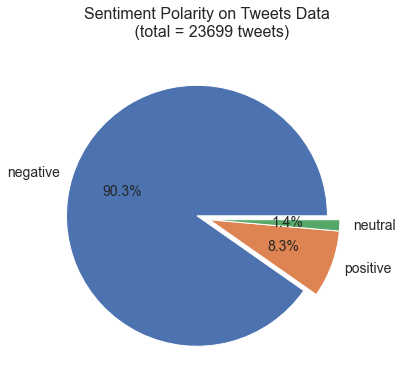

In [18]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 23699 tweets)', fontsize = 16, pad = 20)
plt.show()

## Top 10 Positive and Negative Tweet Sentiments

In [19]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,dalam sambutan kajari muaro jambi kamin menyampaikan bahwa dirinya yang mencetuskan aplikasi sakti pidum tersebut untuk mempercepat dan mempermudah proses kerja penegak hukum sehingga lebih efisien waktu dan tenaga mengingat adanya jarak tempuh yang jauh,9,positive
2,bagi satker piloting sakti pengguna aplikasi sakti tahun lalu cukup menunggu seluruh transaksi selesai dan yakin tak ada perubahan nada,4,positive
3,sedang dilaksanakan rapat koordinasi pelatihan kerja pbk uptd di binaan bbplk bandung tahun anggaran dalam kegiatan ini akan disampaikan materi mengenai kebijakan penyelenggaraan pbk kebijakan penganggaran pelatihan hingga sosialisasi penggunaan aplikasi sakti tahun,4,positive
4,mohon izin bertanya apakah paket internet sakti ini khusus untuk mengakses aplikasi sakti saja atau bisa akses situs lainnya terima kasih dari donid di cinangnong,3,positive
5,bupati sleman resmikan aplikasi sakti link kspps prima artha,2,positive
6,aplikasi sakti membuat diriku tambah sakti karena semua user dipegang oleh satu orang sungguh mantap memang digitalisasi ini,1,positive


In [20]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,text_clean,polarity_score,polarity
1,pengajuan gaji januari dengan aplikasi sakti tim keuangan pa sambas ikuti pendampingan di kppn singkawang,-18,negative
2,kaur tata usaha dan staff keuangan balai pemasyaraktan kelas ii waikabubak mengikuti sosialisasi mekanisme pengajuan up tahun melalui aplikasi sakti yang dilaksanakan secara daring oleh kppn waingapu,-15,negative
3,bendahara pengeluaran dan operator aplikasi sakti ikuti sosialisasi mekanisme pengajuan up,-13,negative
4,era digital memberi kemudahan bagi kita utk kelola apapun salah satu aplikasi yaitu aplikasi sakti disosialisasikan,-12,negative
5,ababil yg kiri kayanya bendahara pengeluarannya ga ikutan latihan bikin spm di aplikasi sakti,-12,negative
6,plis lah pakn ngajarinnya sakti aja butuh banget ilmu aplikasi sakti 🥺 cian adek adek nanti yang buta aplikasi sakti,-12,negative
7,bawaslu lampung selatan mengikuti rapat sosialisasi dan pendampingan pengajuan gaji ppnpn pegawai pemerintah non pegawai negeri dan perekaman uang persediaan pada aplikasi sakti sistem aplikasi keuangan instansi bawaslu kabkota seprovinsi lampung tahun anggaran,-12,negative
8,“bawaslu bengkulu utara mengikuti workshop aplikasi sakti” bengkulu badan pengawas pemilihan umum kabupaten bengkulu utara link web,-11,negative
9,personel satbrimob polda banten melaksanakan bimtek oleh kppn dalam implementasi di aplikasi sakti ta di rupatama polda banten pada kamis polri,-11,negative
10,kemendagri sosialisasikan aplikasi sakti sosialisasi ini bertujuan utk memberikan pemahaman kpd para aparatur bpsdm tentang perubahan sistem pengelolaan keuangan dari kemenkeu,-9,negative


## Word Cloud

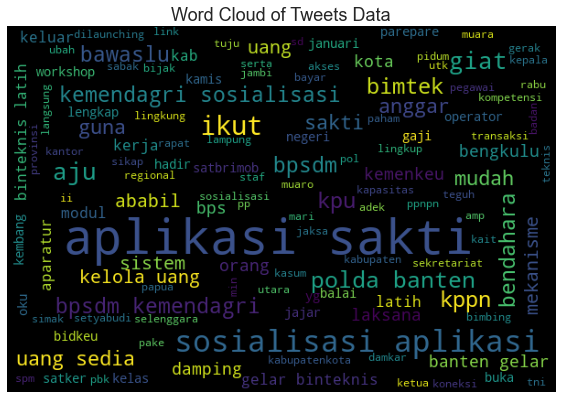

In [21]:
# Visualize word cloud

list_words=''
for tweet in tweets['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

## Positive and Negative Word Cloud

In [22]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

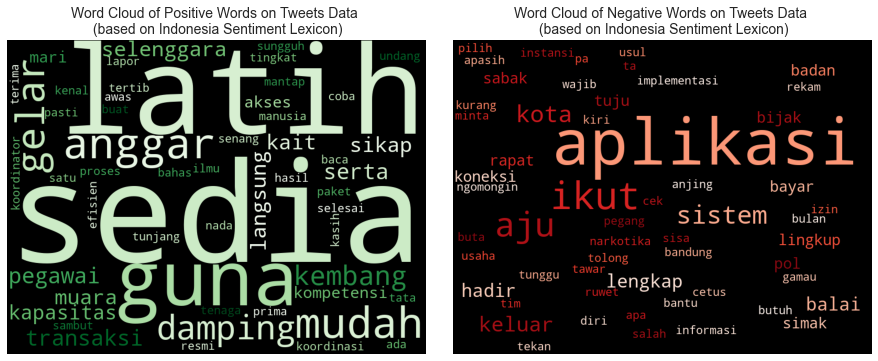

In [23]:
# Visualize positive and negative word cloud

sentiment_words = tweets['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

## Counts of Tweets Created based on Hours

In [ ]:
# Visualize counts of tweets created based on hours

tweets_created = pd.DataFrame()
tweets_created['created_at'] = tweets['created_at'].str.split(' ', expand = True)[1]
tweets_created['created_at'] = pd.to_datetime(tweets_created['created_at'])
tweets_created['created_at']= tweets_created['created_at'].dt.round('H')
tweets_created['created_at'] = tweets_created['created_at'].dt.time
tweets_created

fig, ax = plt.subplots(figsize = (12, 4))
x_values = tweets_created['created_at'].value_counts().sort_index().index
y_values = tweets_created['created_at'].value_counts().sort_index()
sns.lineplot(ax = ax, data = tweets, x = x_values, y = y_values)
ax.set_title('Count of Tweets Created \n (based on hours)', fontsize = 18)
ax.set_xlabel('Hours')
ax.set_xticks(x_values)
ax.set_xticklabels(x_values, rotation = 45)
ax.set_ylabel('Count')
plt.show()

# Sentiment Analysis Using LSTM

## Preprocessing Text Data

In [ ]:
# Make text preprocessed (tokenized) to untokenized with toSentence Function
X = tweets['text_preprocessed'].apply(toSentence) 
max_features = 5000

# Tokenize text with specific maximum number of words to keep, based on word frequency
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape

In [ ]:
# Encode target data into numerical values
polarity_encode = {'negative' : 0, 'neutral' : 1, 'positive' : 2}
y = tweets['polarity'].map(polarity_encode).values

# Split the data (with composition data train 80%, data test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

## Model LSTM

In [ ]:
# Create model function with default hyperparameter values

def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):
    model = Sequential()
    model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
    model.add(LSTM(units = hidden_unit, activation = 'tanh'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 3, activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(lr = learning_rate), metrics = ['accuracy'])
    print(model.summary())
    return model

In [ ]:
# # Hyperparameter tuning (to know the best hyperparameter for this model)

# # Wrapper model with default hyperparameter values
# model = KerasClassifier(build_fn = create_model, epochs = 25, batch_size=128) 

# # Hyperparameters
# embed_dim = [32, 64]
# hidden_unit = [16, 32, 64]
# dropout_rate = [0.2]
# optimizers = [Adam, RMSprop]
# learning_rate = [0.01, 0.001, 0.0001]
# epochs = [10, 25, 50, 100]
# batch_size = [128, 256]
# param_grid = dict(embed_dim = embed_dim, hidden_unit = hidden_unit, dropout_rate = dropout_rate,
#                   learning_rate = learning_rate, optimizers = optimizers, epochs = epochs, batch_size = batch_size)

# # Evaluation model with GridSearchCV to know what the best hyperparameter for model 
# grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
# grid_result = grid.fit(X_train, y_train)

# results = pd.DataFrame()
# results['means'] = grid_result.cv_results_['mean_test_score']
# results['stds'] = grid_result.cv_results_['std_test_score']
# results['params'] = grid_result.cv_results_['params']
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# results.to_csv(r'gridsearchcv_results.csv.csv', index = False, header = True)
# results.sort_values(by='means', ascending = False).reset_index(drop=True)

In [ ]:
# Results from hyperparameter tuning
results = pd.read_csv('data/gridsearchcv_results.csv')
results.sort_values(by='means', ascending = False).reset_index(drop=True)

In [ ]:
# From results above, we know the best hyperparameter for this model is :
# {'batch_size': 128, 'dropout_rate': 0.2, 'embed_dim': 32, 'epochs': 10, 'hidden_unit': 16, 'learning_rate': 0.001, 'optimizers': <class 'keras.optimizers.RMSprop'>}

# Create the model with the best hyperparameter which has been determined
model = KerasClassifier(build_fn = create_model,
                        # Model Parameters
                        dropout_rate = 0.2,
                        embed_dim = 32,
                        hidden_unit = 16,
                        optimizers = RMSprop,
                        learning_rate = 0.001,
                   
                        # Fit Parameters
                        epochs=10, 
                        batch_size=128,
                        # Initiate validation data, which is 10% data from data train. It's used for evaluation model
                        validation_split = 0.1)
                         

model_prediction = model.fit(X_train, y_train)

In [ ]:
# Visualization model accuracy (train and val accuracy)

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model_prediction.history['accuracy'], label = 'train accuracy')
ax.plot(model_prediction.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
# Predict sentiment on data test by using model has been created, and then visualize a confusion matrix


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data:', accuracy)
confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
plt.show()

In [ ]:
# Results from prediction sentiment on data test
text_clean = tweets['text_clean']
text_train, text_test = train_test_split(text_clean, test_size = 0.2, random_state = 0)
result_test = pd.DataFrame(data = zip(text_test, y_pred), columns = ['text', 'polarity'])
polarity_decode = {0 : 'Negative', 1 : 'Neutral', 2 : 'Positive'}
result_test['polarity'] = result_test['polarity'].map(polarity_decode)
pd.set_option('max_colwidth', 300)
result_test

## Predict with Other Data

In [ ]:
# Initializing and preprocessing new text data
otherData = pd.DataFrame()
otherData['text'] = ['enaknya kuliah online,  ga perlu capek" ke kampus dan bisa santai dirumah',
                     'Tapi serius deh semakin kesini ngerasa kuliah online makin ga efektif, ga paham materi blasss, kopong, berasa yauda kek ga kuliah' 
                    ]

otherData['text_clean'] = otherData['text'].apply(cleaningText)
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['text'], axis = 1, inplace = True)

otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
otherData

In [ ]:
# Preprocessing text data

# Make text preprocessed (tokenized) to untokenized with toSentence Function
X_otherData = otherData['text_preprocessed'].apply(toSentence)
X_otherData = tokenizer.texts_to_sequences(X_otherData.values)
X_otherData = pad_sequences(X_otherData, maxlen = X.shape[1])
X_otherData

In [ ]:
# Results from prediction sentiment on text data

y_pred_otherData = model.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'Negative', 1 : 'Neutral', 2 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData